In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from uuid import uuid4
from graphviz import Digraph
import numpy as np
import functions as fn
from auto_grad import CompNode

In [4]:
node = CompNode(val=1)
assert isinstance(node, CompNode)
assert (node + 3).val == (3 + node).val 
assert (node * 3).val == 3
assert (3 * node) == 3
assert (3 * CompNode(2)) == 6
assert (3 == CompNode(3)) == True

In [5]:
data_x, data_y =fn.gen_pts_(1)
xp, yp = CompNode(0.3), CompNode(0.3)
def LossGraph(xp, yp, data_x, data_y):
    Ix, Iy = xp - data_x , yp - data_y
    Gx, Gy = Ix ** 2, Iy ** 2
    M = Gx + Gy
    L =  M ** 0.5
    return L, [xp, yp, Ix, Iy, Gx, Gy, M, L]

loss, rev_topo = LossGraph(xp, yp, data_x[0], data_y[0])
# print(loss)
rev_topo[-1].grad = 1
for idx, val in enumerate(rev_topo[::-1]):
    val.backward_fn()
    print(idx , val)

0 Op: pow, Val: 0.54721, children: 1, grad: 1.00000
1 Op: add, Val: 0.29944, children: 2, grad: 0.91372
2 Op: pow, Val: 0.19518, children: 1, grad: 0.91372
3 Op: pow, Val: 0.10427, children: 1, grad: 0.91372
4 Op: sub, Val: -0.44179, children: 2, grad: -0.80734
5 Op: sub, Val: -0.32290, children: 2, grad: -0.59008
6 Op: assign, Val: 0.30000, children: 0, grad: -0.80734
7 Op: assign, Val: 0.30000, children: 0, grad: -0.59008


In [6]:
def loss_graph(xp, yp, data_x, data_y):
    loss = 0
    for x, y in zip(data_x, data_y):
        loss += ((xp - x) ** 2 + (yp - y) ** 2)**0.5
    return (1/len(data_x)) * loss
data_x, data_y =fn.gen_pts_(1)
xp, yp = CompNode(0.3), CompNode(0.3)
currloss = loss_graph(xp, yp, data_x, data_y)
currloss.backward() # type: ignore


In [7]:
currloss.toposort()

[Op: assign, Val: 0.30000, children: 0, grad: -0.59008,
 Op: assign, Val: 0.62290, children: 0, grad: 0.59008,
 Op: sub, Val: -0.32290, children: 2, grad: -0.59008,
 Op: pow, Val: 0.10427, children: 1, grad: 0.91372,
 Op: assign, Val: 0.30000, children: 0, grad: -0.80734,
 Op: assign, Val: 0.74179, children: 0, grad: 0.80734,
 Op: sub, Val: -0.44179, children: 2, grad: -0.80734,
 Op: pow, Val: 0.19518, children: 1, grad: 0.91372,
 Op: add, Val: 0.29944, children: 2, grad: 0.91372,
 Op: pow, Val: 0.54721, children: 1, grad: 1.00000,
 Op: assign, Val: 0.00000, children: 0, grad: 1.00000,
 Op: add, Val: 0.54721, children: 2, grad: 1.00000,
 Op: assign, Val: 1.00000, children: 0, grad: 0.54721,
 Op: mul, Val: 0.54721, children: 2, grad: 1.00000]

In [10]:
print(xp.grad, yp.grad, currloss.val) 
fn.calc_grad(0.3, 0.3, data_x, data_y) , fn.loss(0.3, 0.3, data_x, data_y)

-0.5900849147094943 -0.8073411877467226 0.5472122517293468


((-0.5900849147094943, -0.8073411877467226), 0.5472122517293468)

## Notes
- I'm not sure about the drawing graph part, try adding more points and see how it works

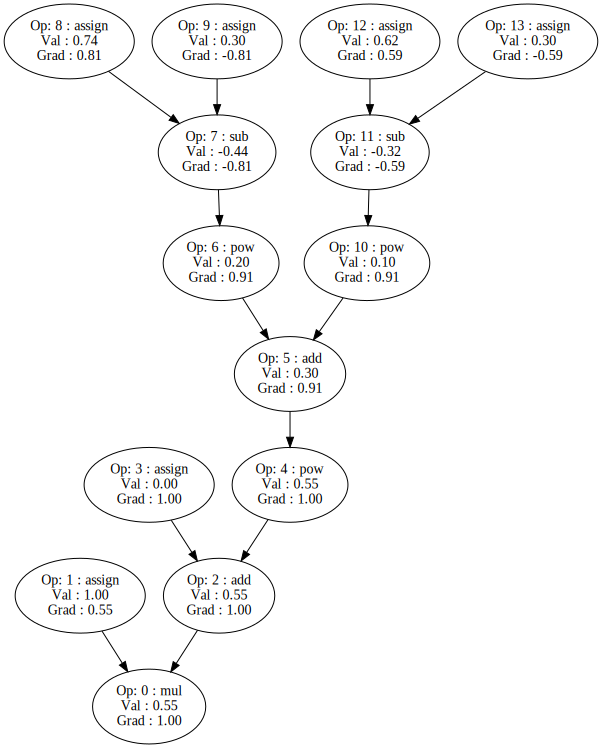

In [9]:
currloss.draw_graph()